# Deliverables

Your final submission will be three things:

A Github repo with your code and results, with instructions on how to run the code
A powerpoint presentation detailing your project and findings
A video presenting your presentation and code

### Option 1: Visual and Genre Classification

Data Processing: Easy
Modeling: Hard
Interactive: Medium <br>

This dataset is a unique collection of high-quality movie and series poster images from IMDB, meticulously handpicked to represent their respective genres accurately. Accompanying these images are detailed plot summaries, each containing more than 150 words, providing rich textual data for analysis.
<br>
The dataset focuses on four primary genres: Action, Comedy, Horror, and Romance. The combination of visual and textual data makes this dataset ideal for multimodal analysis and genre classification tasks. It offers an excellent opportunity for researchers and enthusiasts to delve into the world of movies and series, explore genre characteristics, and develop models that can understand and predict genre based on visual cues and plot descriptions. This dataset is a valuable resource for anyone interested in film studies, machine learning, and data science.
<br>
You are tasked to do the following:
<br>
1. Load in the data and analyze each column.
2. Clean the movie summary column in any way you see fit.
3. Build a summarization tool and summarize a few of the movies.
4. Build at least four models on the dataset. You must have at least one naive bayes model, one generalized linear model (ex: logistic regression), and one tensorflow model (ex: LSTM).
5. Evaulate the models in terms of overall accuracy and accuracy by genre.
6. For your tensorflow model(s), plot your models and plot accuracy over epoch number.
7. Show the most important words from each model and build a word cloud accompanying it.
8. Find movies that had a different prediction based on the model. Explain why you think those models predicted one genre vs. the other.
9. Build an interactive tool that can take a real or fake movie summary, clean the text, and predict the movie genre based on your models.
10. Add any other techniques taught from the course that could be applied for this project.
11. Present these findings in a 10 minute video with slides, sample code and a demonstration of your interactive tool.
12. BONUS (optional): extract the images and map them with the genre of movie. Build a model classifying the genre based on the movie images.

In [ ]:
# ! pip install kaggle
# ! pip install gdown
# ! apt-get install -y libgl1-mesa-glx

## 1. Data Loading

In [2]:
# for local:
#! pip install kaggle
# import kaggle

# # Download latest version
# path = kagglehub.dataset_download("zulkarnainsaurav/imdb-multimodal-vision-and-nlp-genre-classification")

# print("Path to dataset files:", path)

In [3]:
import kagglehub
import pandas as pd
import numpy as np
import os
import cv2
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
# for colab - download the data

from google.colab import drive
import os

# Mount Google Drive if needed
drive.mount('/content/drive')

# Only download if the dataset folder doesn't already exist
if not os.path.exists("dataset"):
    # Install gdown (if not already installed)
    !pip install -U gdown

    # Download the dataset froSm shared Google Drive link via file ID
    !gdown --id 1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6 --output dataset.zip

    # Unzip quietly into the "dataset" folder
    !unzip -q dataset.zip -d dataset/
else:
    print("'dataset/' folder already exists. Skipping download.")



Mounted at /content/drive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6
From (redirected): https://drive.google.com/uc?id=1o06RUiQJtQrAh2h28c4Ib_l_jeeAT3l6&confirm=t&uuid=8548703f-4afb-4185-974a-ea70de27d6c1
To: /content/dataset.zip
100% 58.8M/58.8M [00:00<00:00, 129MB/s]


In [5]:


# load dataset - eg: IMDB_four_genre_larger_plot_description
import pandas as pd

df = pd.read_csv("dataset/IMDB_four_genre_larger_plot_description.csv")  # Replace with actual CSV name
df.head()


,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [6]:
# Set paths after unzip
DATA_DIR = "dataset/IMDB four_genre_posters"
CSV_FILE = "dataset/IMDB four_genre_larger_plot_description.csv"
IMAGE_SIZE = (128, 192)
GENRES = ['Comedy', 'Horror', 'Romance', 'Action']

In [ ]:
# image_path = os.path.join(DATA_DIR, genre, filename)

In [ ]:
# # 1. Load Descriptions from CSV
# def load_descriptions(csv_file):
#     """
#     Load the movie descriptions from the CSV file
#     into a dictionary keyed by movie_id
#     """
#     descriptions = {}
#     with open(csv_file, 'r') as csvfile:
#         csv_reader = csv.DictReader(csvfile)
#         for row in csv_reader:
#             movie_id = row['movie_id'].strip()
#             description = row['description'].strip()
#             descriptions[movie_id] = description
#     return descriptions

# image_descriptions = load_descriptions(CSV_FILE)


# # 2. Load and Preprocess a Single Image
# def load_image(image_path, target_size=IMAGE_SIZE):
#     """
#     Load a grayscale image, resize it, and normalize pixel values to [0, 1].
#     """
#     try:
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         if image is not None:
#             image = cv2.resize(image, target_size)
#             return image / 255.0
#         else:
#             print(f"[Warning] Failed to load image: {image_path}")
#             return None
#     except Exception as e:
#         print(f"[Error] Processing image {image_path}: {str(e)}")
#         return None


# # 3. Load the Full Dataset (Images + Labels)
# def load_dataset(image_dir, descriptions_dict, genres=GENRES):
#     """
#     Load images and labels, filter out entries with no matching description.
#     Returns: image array, label array, id array
#     """
#     images, labels, movie_ids = [], [], []

#     # Initialize label encoder
#     label_encoder = LabelEncoder()
#     label_encoder.fit(genres)
#     print("Class to Label Mapping:", dict(zip(genres, label_encoder.transform(genres))))

#     # Traverse genre folders
#     for genre in genres:
#         genre_path = os.path.join(image_dir, genre)
#         for filename in os.listdir(genre_path):
#             movie_id = filename.replace('.jpg', '').strip()
#             full_path = os.path.join(genre_path, filename)
#             image = load_image(full_path)

#             if image is not None and movie_id in descriptions_dict:
#                 images.append(image)
#                 labels.append(label_encoder.transform([genre])[0])
#                 movie_ids.append(movie_id)

#     return np.array(images), np.array(labels), np.array(movie_ids)

In [ ]:
# data, labels, ids = load_dataset(DATA_DIR, image_descriptions)
# print(data.shape, labels.shape, ids.shape)

In [ ]:
# Load image descriptiond
# image_descriptions = load_descriptions(CSV_FILE)

In [7]:
# Load the poster pixel data

# Check if file already exists
if not os.path.exists("imdb_posters.npz"):
    # Install gdown if needed
    !pip install -U -q gdown

    # Download the file using the file ID from the shareable link
    # Your link: https://drive.google.com/file/d/1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re/view?usp=sharing
    # Extract the ID: 1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re
    !gdown --id 1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re --output imdb_posters.npz

    print("Downloaded imdb_posters.npz")
else:
    print("imdb_posters.npz already exists. Skipping download.")

# Load compressed NumPy archive
npzfile = np.load("imdb_posters.npz", allow_pickle=True)

# Preview keys in the archive
print("Contents of NPZ file:", npzfile.files)



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re
To: /content/imdb_posters.npz
100% 22.6M/22.6M [00:00<00:00, 96.7MB/s]
Downloaded imdb_posters.npz
Contents of NPZ file: ['data', 'labels', 'ids']


In [8]:
# Load compressed NumPy archive
npzfile = np.load("imdb_posters.npz", allow_pickle=True)

data = npzfile['data']
labels = npzfile['labels']
ids = npzfile['ids']

print(data.shape, labels.shape, ids.shape)

(724, 192, 128) (724,) (724,)


In [ ]:
data[[0]]

##### Data
- 724 images, size as 192 * 128
- each image as a 2D NumPy array with normalized pixel ranging in [0.0, 1.0] <br>

##### Label
- one label per image, as integer of 1 to 4

##### Movie IDs

##### Movie Description
- dictionary with movie id as key, movie description as value

## 2. Movie Description Cleaning


In [12]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.8 MB/s eta 0:00:00


In [13]:
# Movie Description Cleaning
import re, string, nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
import contractions

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
punct_tbl  = str.maketrans("", "", string.punctuation)


def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = contractions.fix(text) # "doesn't" → "does not"
    text = text.strip().lower() # convert to lower case letters
    text = re.sub(r"[^a-z\s]", "", text) # keep only English letters
    text = re.sub(r"(https?://\S+|www\.\S+|\S+@\S+)", " ", text)  # drop URLs & e-mails
    text = re.sub(r"\b\d+\b", " ", text)                          # replace standalone numbers with space
    text = text.translate(punct_tbl)                              # punctuation

    # drop stop words
    words = text.split()
    words = [w for w in words if w not in stop_words]
    cleaned = " ".join(words)

    return re.sub(r"\s{2,}", " ", cleaned).strip()

# def tokenize_and_lemmatise(text: str) -> list[str]:
#     tokens = word_tokenize(text)
#     tokens = [t for t in tokens if t not in stop_words]
#     return [lemmatizer.lemmatize(t) for t in tokens]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:

df["cleaned_description"] = df["description"].apply(clean_text)

In [ ]:
df[df["movie_id"] == "tt12783454"]["cleaned_description"].values[0] # test case

'elle evans joey king finally completed high school goes road trip week noah flynn jacob elordi lee flynn joel courtney rachel meganne young elle finally decide future unluckily enough elle got accepted two schools harvard berkeley noah got harvard lee berkeley lie saying got waitlisted crush feelings unforgettable adventures camping fishing watching shooting star going aquarium watching sunset although lee elle rule saying must always go school bestie decides think later leave san francisco embarking amazing adventures together unfortunately road trip comes end elle got job waiter get money college despite knowing one go days later noah elle flynns summer house noah asks unexpected question harvard suggested elle gets wait list could go campus get apartment together eventually lee ends jumping balcony drenching noah elle water rachel comes hands drinks elle still ignoring schools buy time noah elle leave lee rachel talk college plans later day lunch mr mrs flynn lee mentions go beach 

In [ ]:
# # Load movie descriptions as dictionary
# description_dict = dict(zip(df['movie_id'], df['description']))
# print(description_dict['tt12783454'][:100]) # testting

# # Get descriptions that match image ids
# matched_descriptions = [description_dict[movie_id] for movie_id in ids]


# EDA

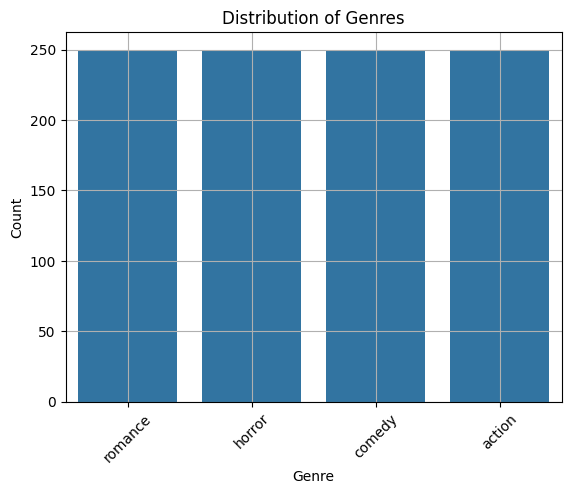

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="genre", order=df["genre"].value_counts().index)
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


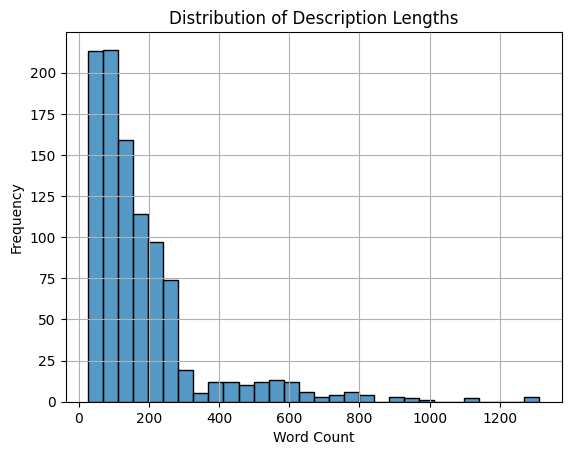

In [ ]:
df["desc_length"] = df["cleaned_description"].apply(lambda x: len(x.split()))
sns.histplot(df["desc_length"], bins=30)
plt.title("Distribution of Description Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


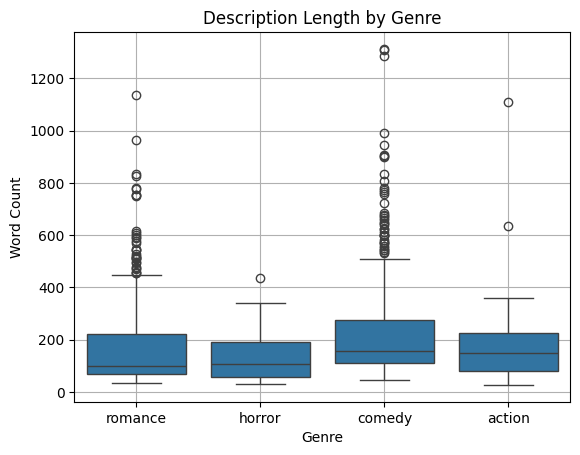

In [ ]:
sns.boxplot(data=df, x="genre", y="desc_length")
plt.title("Description Length by Genre")
plt.xlabel("Genre")
plt.ylabel("Word Count")
plt.grid(True)
plt.show()


In [ ]:
from collections import Counter

for genre in df["genre"].unique():
    words = " ".join(df[df["genre"] == genre]["cleaned_description"]).split()
    most_common = Counter(words).most_common(10)
    print(f"\nTop words for {genre}:")
    for word, freq in most_common:
        print(f"  {word}: {freq}")



Top words for romance:
  love: 328
  life: 210
  tells: 177
  family: 170
  one: 167
  time: 157
  back: 152
  day: 143
  relationship: 143
  two: 140

Top words for horror:
  house: 163
  family: 142
  mother: 138
  young: 137
  one: 134
  night: 123
  find: 115
  home: 112
  new: 108
  two: 102

Top words for comedy:
  one: 296
  family: 253
  life: 241
  back: 235
  get: 232
  new: 224
  friends: 204
  find: 201
  time: 193
  go: 190

Top words for action:
  one: 158
  world: 137
  life: 130
  new: 122
  man: 121
  team: 120
  must: 114
  mission: 108
  young: 105
  find: 105


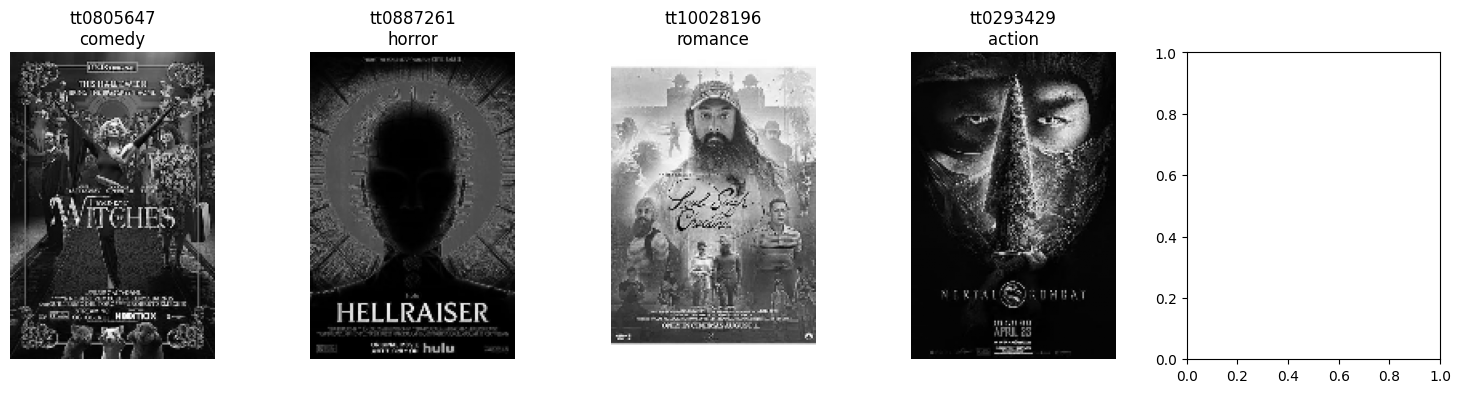

In [ ]:
def show_sample_images(images, genres, ids, labels, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15, 4))

    genres = [g.lower() for g in genres]
    genre_labels = np.array([str(l).lower() for l in labels])

    shown = 0
    for genre in genres:
        indices = np.where(genre_labels == genre)[0]
        if len(indices) == 0:
            print(f"[Skip] No image found for genre: {genre}")
            continue
        idx = indices[0]
        axes[shown].imshow(images[idx], cmap='gray')
        axes[shown].set_title(f"{ids[idx]}\n{genre}")
        axes[shown].axis('off')
        shown += 1
        if shown >= n:
            break
    plt.tight_layout()
    plt.show()

genre_labels = le.inverse_transform(labels)
show_sample_images(data, GENRES, ids, genre_labels)


In [ ]:
print(df.isnull().sum())         # Check missing values


movie_id               0
description            0
genre                  0
label                  0
cleaned_description    0
desc_length            0
dtype: int64
genre
romance    250
horror     250
comedy     250
action     250
Name: count, dtype: int64


## 3. Movie Description Summarization Tool - Build a summarization tool and summarize a few of the movies.

In [ ]:
# !pip install transformers

In [ ]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from transformers import pipeline

# Load Pegasus
model_name = "google/pegasus-cnn_dailymail"
summarizer = pipeline("summarization", model=model_name, tokenizer=model_name)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


In [ ]:
def chunk_text(text, chunk_size=500):
    """
    Split long text into smaller chunks of ~chunk_size words.
    """
    words = text.split()
    return [" ".join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]


def summarize_long_text(text, summarizer, max_length=200, min_length=70):
    """
    Break long text into chunks, summarize each chunk, and return concatenated summaries.
    """
    chunks = chunk_text(text, chunk_size=500)  # you can adjust this
    summaries = []

    for chunk in chunks:
        try:
            summary = summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            print(f"[Error] Skipping chunk due to: {e}")
            continue

    return " ".join(summaries)


In [ ]:
# Load the summarizer
summarizer = pipeline("summarization", model="google/pegasus-cnn_dailymail")

# Apply to a long description
example_text = df[df['movie_id'] == 'tt12783454']['description'].values[0]

summary = summarize_long_text(example_text, summarizer)
print(summary)


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


Elle Evans (Joey King) has finally completed high school and goes on a road trip for a week with Noah Flynn (Jacob Elordi), Lee Flynn (Joel Courtney), and Rachel (Meganne Young)<n>Unluckily enough, Elle got accepted into two schools: Harvard and Berkeley.<n>Now, Elle needs to decide, whether she goes with Noah to Harvard or to Berkeley with Lee. Elle and Lee have a beach bucket list of all the things they wanted to do before going to college .<n>Elle tells her father about staying at the beach house the whole summer .<n>A lot of friends join such as the OMG girls (Bianco Bosch, Camilla Wolfson and Zandile Madliwa), Tuppen (Joshua Daniel Eady), and Ashton (Cameron Scott) Elle and Lee try to convince Noah to wear a costume for their race day. Noah denies and Lee leaves very frustratedly.<n>Elle and Lee go to their favorite arcade and find a note on the DDR machine saying they would get rid of it.<n>Chloe gets a message from her parents that they're getting a divorce. She tells Noah and t

### add summary as new column to df

In [ ]:
# add summary as new column to df
# df["summary"] = df["description"].apply(lambda x: summarize_long_text(x, summarizer))

Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)
Your max_length is set to 200, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 200, but your input_length is only 190. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)
Your max_length is set to 200, but your input_length is only 154. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)
Y

In [ ]:
df.head()
# df.to_csv("summarized_descriptions.csv", index=False)

,movie_id,description,genre,cleaned_description,label,summary
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance,elle evans joey king finally completed high sc...,3,Elle Evans (Joey King) has finally completed h...
1,tt1798632,A young girl tries to understand how she myste...,horror,young girl tries understand mysteriously gaine...,2,A young girl tries to understand how she myste...
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,england well meaning selfish young woman meddl...,1,Emma Woodhouse is a restless queen bee without...
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance,abby holland kristen stewart harper caldwell m...,3,Abby Holland (Kristen Stewart) and Harper Cald...
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,olga maks years apart successful woman establi...,3,Maks is a very attractive Italian man working ...


In [ ]:
from transformers import pipeline
from datasets import Dataset
import pandas as pd

# Load data
# Assuming 'df' is your DataFrame and it has a column named 'description'
# If not already loaded, use: df = pd.read_csv("your_file.csv")

# Load a faster summarizer model (optional but recommended)
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Optional: fallback if you still want Pegasus (slower but more accurate)
# summarizer = pipeline("summarization", model="google/pegasus-cnn_dailymail")

# Helper function for summarizing a single text
def summarize_chunk(chunk, summarizer):
    try:
        chunk_len = len(chunk.split())
        max_len = min(int(chunk_len * 0.5), 60)
        min_len = max(10, int(max_len / 2))
        return summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)[0]['summary_text']
    except Exception as e:
        print(f"[Error] Skipping chunk due to: {e}")
        return ""

# For longer texts, split and summarize
def chunk_text(text, chunk_size=500):
    words = text.split()
    return [" ".join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

def summarize_long_text(text, summarizer):
    if len(text.split()) < 500:
        return summarize_chunk(text, summarizer)
    chunks = chunk_text(text, chunk_size=500)
    summaries = [summarize_chunk(chunk, summarizer) for chunk in chunks]
    return " ".join(summaries)

# Use HuggingFace Dataset to batch-process with map (much faster)
def summarize_batch(examples):
    return {"summary": [summarize_long_text(desc, summarizer) for desc in examples["description"]]}

# Convert DataFrame to HuggingFace Dataset
dataset = Dataset.from_pandas(df[['description']])
dataset = dataset.map(summarize_batch, batched=True, batch_size=8)  # Adjust batch_size based on RAM

# Add back to DataFrame
# df["summary"] = dataset["summary"]
# df.to_csv("summarized_descriptions.csv", index=False)


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from transformers import pipeline

# Load Pegasus
model_name = "google/pegasus-cnn_dailymail"
summarizer = pipeline("summarization", model=model_name, tokenizer=model_name)

def chunk_text(text, chunk_size=500):
    """
    Split long text into smaller chunks of ~chunk_size words.
    """
    words = text.split()
    return [" ".join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]


def summarize_long_text(text, summarizer, max_length=200, min_length=70):
    """
    Break long text into chunks, summarize each chunk, and return concatenated summaries.
    """
    chunks = chunk_text(text, chunk_size=500)  # you can adjust this
    summaries = []

    for chunk in chunks:
        try:
            summary = summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            print(f"[Error] Skipping chunk due to: {e}")
            continue

    return " ".join(summaries)


# Load the summarizer
summarizer = pipeline("summarization", model="google/pegasus-cnn_dailymail")

# Apply to a long description
example_text = df[df['movie_id'] == 'tt12783454']['description'].values[0]
summary = summarize_long_text(example_text, summarizer)
print(summary)

## 4+5. Build at least four models on the dataset. You must have at least one naive bayes model, one generalized linear model (ex: logistic regression), and one tensorflow model (ex: LSTM) & Evaulate the models in terms of overall accuracy and accuracy by genre.


In [ ]:
# !pip install -q scikit-learn pandas
# !pip install --upgrade transformers datasets

In [15]:
import pandas as pd
import numpy as np
import re
import torch
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

- preprocess

In [16]:
# Label encoding
import joblib
le = LabelEncoder()
df["label"] = le.fit_transform(df["genre"])  # 0–3 for 4 genres

# Save during training
joblib.dump(le, "label_encoder.pkl")

# Split text and labels
X = df["cleaned_description"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [17]:
# Toeknization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on all descriptions and transform
X_tfidf = vectorizer.fit_transform(df['cleaned_description'])

# Labels
y = df['genre']

## model 1:  Naive Bayes (required) + Logisitc Regression (required)

### Why Naive Bayes and Logistic Regression do NOT use tokenized sequences
They operate on vectorized text features, like from TfidfVectorizer, not raw tokens or sequences.

These are linear models and require fixed-length feature vectors (not sequences).

So instead of using sequences of word indices (like [4, 98, 23, ...]), they use a term-document matrix generated by:

In [18]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB().fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000).fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Evaluation
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


=== Naive Bayes ===
              precision    recall  f1-score   support

      action       0.78      0.86      0.82        50
      comedy       0.64      0.46      0.53        50
      horror       0.76      0.78      0.77        50
     romance       0.64      0.74      0.69        50

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.71      0.70       200

=== Logistic Regression ===
              precision    recall  f1-score   support

      action       0.75      0.88      0.81        50
      comedy       0.63      0.66      0.65        50
      horror       0.84      0.72      0.77        50
     romance       0.72      0.66      0.69        50

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [ ]:
# Fixed Training Code
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your dataframe with 'cleaned_description' and 'genre' columns

# 1. Create and fit label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(df["genre"])  # Encode string genres to numbers

# 2. Split the data
X = df["cleaned_description"]
y = y_encoded  # Use the encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Create and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train models
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# 5. Evaluate models
y_pred_nb = nb_model.predict(X_test_vec)
y_pred_lr = lr_model.predict(X_test_vec)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# 6. Save all models and tools
joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Models saved successfully!")
print(f"Label classes: {le.classes_}")



=== Naive Bayes ===
              precision    recall  f1-score   support

      action       0.77      0.86      0.81        50
      comedy       0.67      0.52      0.58        50
      horror       0.82      0.80      0.81        50
     romance       0.64      0.72      0.68        50

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

=== Logistic Regression ===
              precision    recall  f1-score   support

      action       0.76      0.88      0.81        50
      comedy       0.63      0.66      0.65        50
      horror       0.84      0.72      0.77        50
     romance       0.72      0.68      0.70        50

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

Models saved successfully!
Label classes: ['action' 'comedy' 'horror' 'romance']


In [ ]:
# 6. Save all models and tools
joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Models saved successfully!")
print(f"Label classes: {le.classes_}")

Models saved successfully!
Label classes: ['action' 'comedy' 'horror' 'romance']


In [ ]:
from google.colab import files

files.download("label_encoder.pkl")
files.download("naive_bayes_model.pkl")
files.download("logistic_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* model 3: LSTM / BiLSTM (required - TensorFlow)


In [ ]:
# LSTM
# Step 3: Tokenize and pad sequences
keras_tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
keras_tokenizer.fit_on_texts(X)
X_seq = keras_tokenizer.texts_to_sequences(X)
X_seq = pad_sequences(X_seq, maxlen=300)

# Step 4: Train-test split
X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(
    X_seq, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Define and compile model
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=300),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train
history = lstm_model.fit(
    X_seq_train, y_seq_train,
    epochs=5,
    validation_split=0.1,
    batch_size=32
)

# Step 7: Evaluate
lstm_loss, lstm_acc = lstm_model.evaluate(X_seq_test, y_seq_test)
print(f"LSTM Accuracy: {lstm_acc:.4f}")

# Step 8: Save model and tokenizer
lstm_model.save("lstm_model.keras")

import json
with open("lstm_tokenizer.json", "w") as f:
    f.write(keras_tokenizer.to_json())

# Step 9: Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Invalid dtype: object

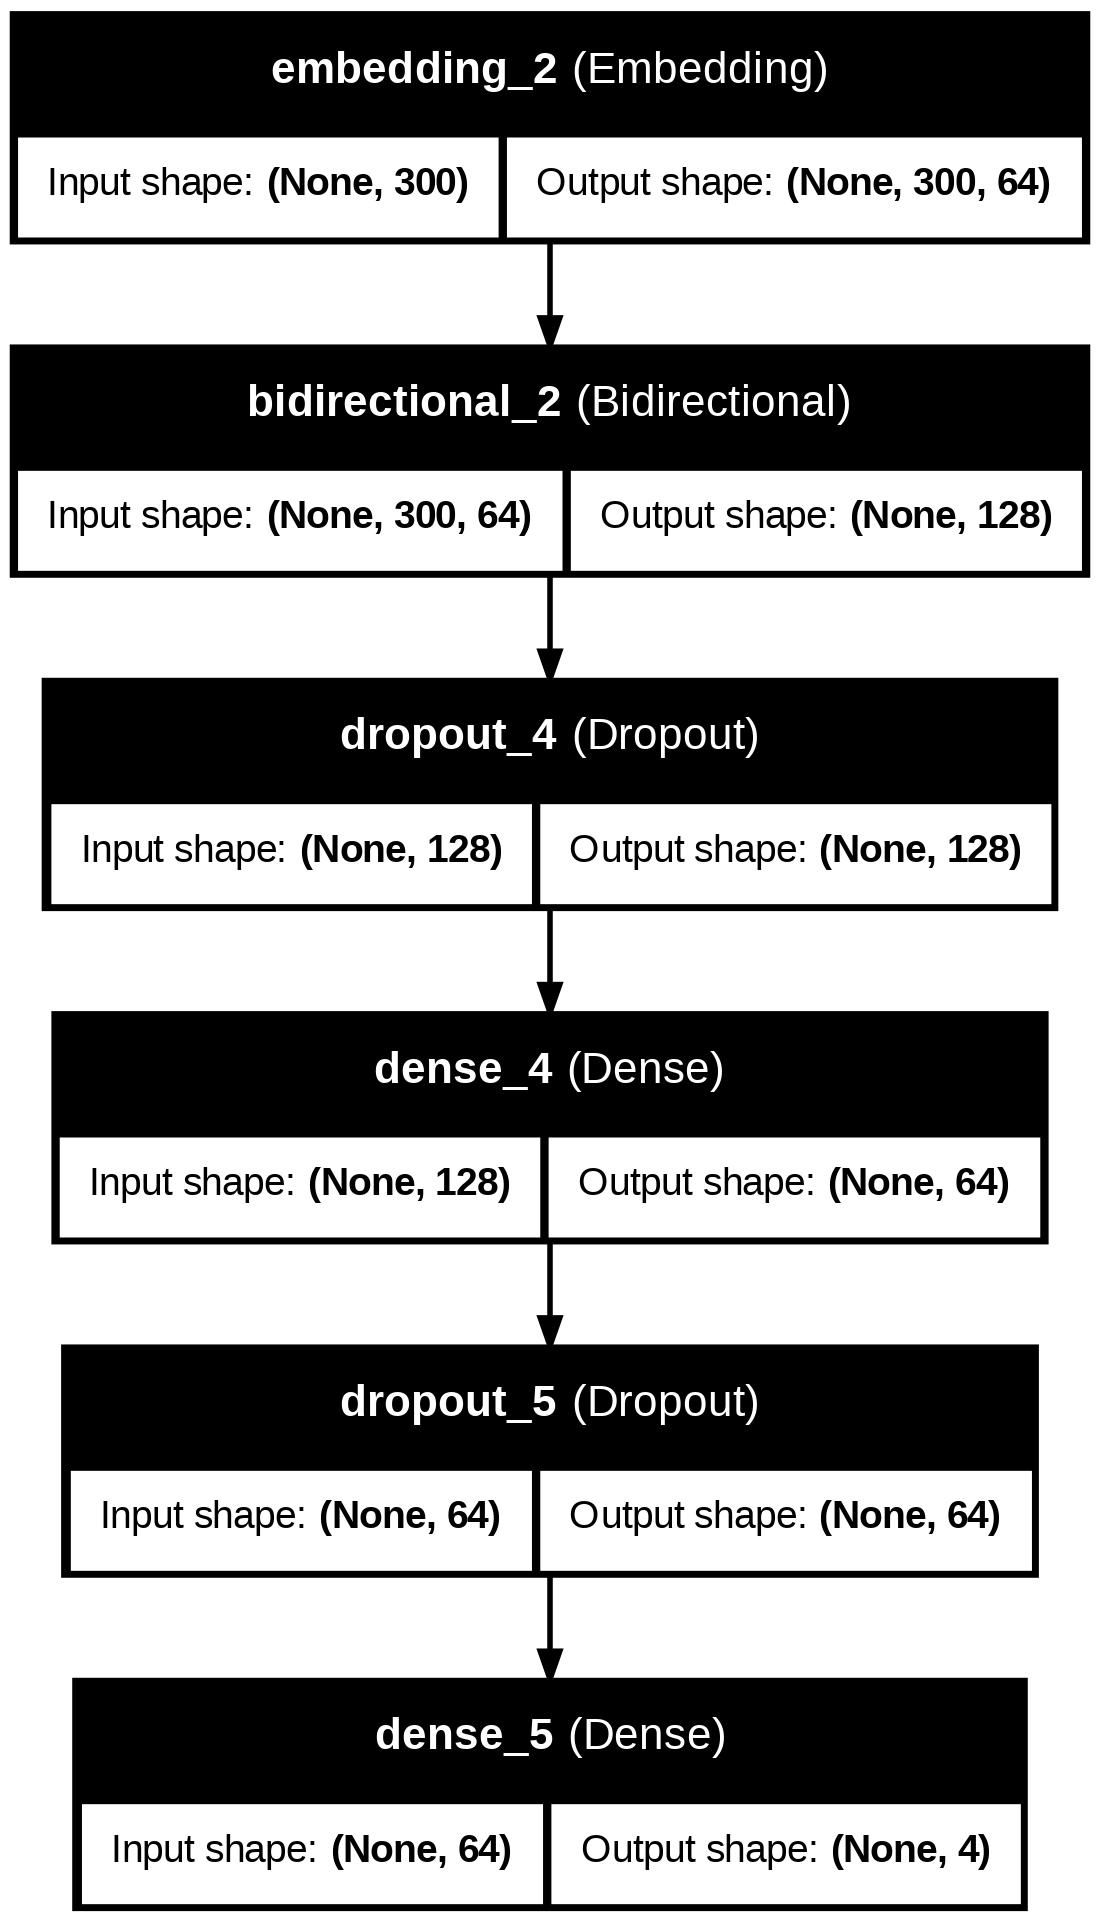

In [ ]:
# plot model
from tensorflow.keras.utils import plot_model

# Plot model architecture
plot_model(lstm_model, to_file="lstm_model_architecture.png", show_shapes=True, show_layer_names=True)


In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import os
# Initialize trainer and train
from transformers import DataCollatorWithPadding

os.environ["WANDB_DISABLED"] = "true"
# Tokenizer and model
hf_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X.tolist(), y.tolist(), test_size=0.2, stratify=y, random_state=42
)


train_enc = hf_tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_enc = hf_tokenizer(val_texts, truncation=True, padding=True, max_length=256)

# Create Hugging Face datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_enc['input_ids'],
    'attention_mask': train_enc['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_enc['input_ids'],
    'attention_mask': val_enc['attention_mask'],
    'labels': val_labels
})

# Load model
hf_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    logging_dir='./logs',
    logging_steps=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01
)

data_collator = DataCollatorWithPadding(tokenizer=hf_tokenizer)

trainer = Trainer(
    model=hf_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,  # ← new
)


trainer.train()



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
20,1.353100
40,1.227200
60,1.064200
80,0.909800
100,0.817700
120,0.748800
140,0.698600


TrainOutput(global_step=150, training_loss=0.9520790449778239, metrics={'train_runtime': 66.372, 'train_samples_per_second': 36.16, 'train_steps_per_second': 2.26, 'total_flos': 158966548070400.0, 'train_loss': 0.9520790449778239, 'epoch': 3.0})

* model 4: Transformer - DistilBERT or BERT (fine-tuned)

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)



{'eval_loss': 0.7280906438827515, 'eval_runtime': 1.3391, 'eval_samples_per_second': 149.357, 'eval_steps_per_second': 9.708, 'epoch': 3.0}


# save & load models

In [ ]:
# save models: Naive Bayes & Logistic Regression (Scikit-Learn)

import joblib

joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")



['tfidf_vectorizer.pkl']

In [ ]:
# load
nb_model = joblib.load("naive_bayes_model.pkl")
lr_model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [ ]:
# save models: LSTM (Keras)

lstm_model.save("lstm_model.keras")  # or .h5 for legacy format




In [ ]:
from tensorflow.keras.models import load_model
lstm_model = load_model("lstm_model.keras")

import json

# Save tokenizer
token_json = keras_tokenizer.to_json()
with open("lstm_tokenizer.json", "w") as f:
    f.write(token_json)

from tensorflow.keras.preprocessing.text import tokenizer_from_json

with open("lstm_tokenizer.json") as f:
    keras_tokenizer = tokenizer_from_json(f.read())

In [ ]:
# save models: Transformer (Hugging Face DistilBERT)

hf_model.save_pretrained("bert_model/", safe_serialization=False)

hf_tokenizer.save_pretrained("bert_model/")


('bert_model/tokenizer_config.json',
 'bert_model/special_tokens_map.json',
 'bert_model/vocab.txt',
 'bert_model/added_tokens.json',
 'bert_model/tokenizer.json')

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

hf_tokenizer = DistilBertTokenizerFast.from_pretrained("/content/bert_model")
hf_model = DistilBertForSequenceClassification.from_pretrained("/content/bert_model")

## 7. Most Important Words of Each Model

In [ ]:
# !pip install ace_tools

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
genre_names = df["genre"].unique()

# Top words for each model
topn = 50
top_words_nb = {genre: [] for genre in genre_names}
top_words_lr = {genre: [] for genre in genre_names}
top_words_lstm = {}
top_words_bert = {}

genre_to_label = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
# Find top 50 words in each genre of the model
for genre in genre_names:
    idx = genre_to_label[genre]

    # Naive Bayes
    top_nb_indices = np.argsort(nb_model.feature_log_prob_[idx])[::-1][:topn]
    top_words_nb[genre] = [(feature_names[i], round(np.exp(nb_model.feature_log_prob_[idx][i]), 5)) for i in top_nb_indices]

    # Logistic Regression
    top_lr_indices = np.argsort(lr_model.coef_[idx])[::-1][:topn]
    top_words_lr[genre] = [(feature_names[i], round(lr_model.coef_[idx][i], 5)) for i in top_lr_indices]

    # LSTM/BERT fallback using TF-IDF
    genre_texts = df[df["genre"] == genre]["cleaned_description"]
    vec = vectorizer.transform(genre_texts)
    summed = np.asarray(vec.sum(axis=0)).flatten()
    top_tf_indices = np.argsort(summed)[::-1][:topn]
    tfidf_words = [(feature_names[i], round(summed[i], 2)) for i in top_tf_indices]
    top_words_lstm[genre] = tfidf_words
    top_words_bert[genre] = tfidf_words


# Convert to DataFrames for table display
nb_dfs = {genre: pd.DataFrame(top_words_nb[genre], columns=["word", "frequency"]) for genre in genre_names}
lr_dfs = {genre: pd.DataFrame(top_words_lr[genre], columns=["word", "coefficient"]) for genre in genre_names}
lstm_dfs = {genre: pd.DataFrame(top_words_lstm[genre], columns=["word", "tfidf_sum"]) for genre in genre_names}
bert_dfs = {genre: pd.DataFrame(top_words_bert[genre], columns=["word", "tfidf_sum"]) for genre in genre_names}


In [ ]:
# Romance
# Show top 20 words for 'romance'
print("=== Top 20 Words in Naive Bayes - Romance ===")
print(nb_dfs["romance"].head(20))

print("\n=== Top 20 Words in Logistic Regression - Romance ===")
print(lr_dfs["romance"].head(20))

print("\n=== Top 20 Words in LSTM (TF-IDF fallback) - Romance ===")
print(lstm_dfs["romance"].head(20))

print("\n=== Top 20 Words in BERT (TF-IDF fallback) - Romance ===")
print(bert_dfs["romance"].head(20))

=== Top 20 Words in Naive Bayes - Romance ===
               word  frequency
0       los angeles    0.00180
1            lethal    0.00097
2          receives    0.00087
3             yoshi    0.00082
4          stealing    0.00072
5             fairy    0.00068
6           witness    0.00068
7               odd    0.00065
8              meal    0.00063
9         fantasies    0.00063
10              gen    0.00061
11             main    0.00060
12     truth behind    0.00060
13              mom    0.00060
14            maren    0.00058
15           thrust    0.00057
16  revolves around    0.00057
17             baby    0.00056
18            threw    0.00056
19            words    0.00054

=== Top 20 Words in Logistic Regression - Romance ===
               word  coefficient
0       los angeles      3.10241
1          receives      1.39243
2   revolves around      0.96742
3            heaven      0.84799
4             maren      0.82218
5              meal      0.76729
6              te

In [ ]:
# Comedy
# Show top 20 words for 'Comedy'
print("=== Top 20 Words in Naive Bayes - Comedy ===")
print(nb_dfs["comedy"].head(20))

print("\n=== Top 20 Words in Logistic Regression - Comedy ===")
print(lr_dfs["comedy"].head(20))

print("\n=== Top 20 Words in LSTM (TF-IDF fallback) - Comedy ===")
print(lstm_dfs["comedy"].head(20))

print("\n=== Top 20 Words in BERT (TF-IDF fallback) - Comedy ===")
print(bert_dfs["comedy"].head(20))

=== Top 20 Words in Naive Bayes - Comedy ===
            word  frequency
0          frank    0.00080
1         lethal    0.00079
2            odd    0.00078
3          fairy    0.00078
4           near    0.00074
5          gangs    0.00070
6           salt    0.00068
7        madness    0.00062
8           baby    0.00060
9           film    0.00060
10   get revenge    0.00059
11  truth behind    0.00059
12         threw    0.00058
13     fantasies    0.00058
14        horner    0.00057
15     daughters    0.00057
16      berkeley    0.00055
17         words    0.00054
18       thieves    0.00054
19         judge    0.00054

=== Top 20 Words in Logistic Regression - Comedy ===
           word  coefficient
0         frank      0.98171
1         keeps      0.83892
2        sports      0.74191
3       madness      0.73182
4         judge      0.70603
5    christians      0.67763
6       massimo      0.66610
7     forgotten      0.66212
8         gangs      0.64590
9       package      0.

In [ ]:
# Action
# Show top 20 words for 'Action'
print("=== Top 20 Words in Naive Bayes - Action ===")
print(nb_dfs["action"].head(20))

print("\n=== Top 20 Words in Logistic Regression - Action ===")
print(lr_dfs["action"].head(20))

print("\n=== Top 20 Words in LSTM (TF-IDF fallback) - Action ===")
print(lstm_dfs["action"].head(20))

print("\n=== Top 20 Words in BERT (TF-IDF fallback) - Action ===")
print(bert_dfs["action"].head(20))

=== Top 20 Words in Naive Bayes - Action ===
                word  frequency
0              tammy    0.00082
1              words    0.00081
2        millionaire    0.00077
3               main    0.00076
4               muds    0.00072
5         walks away    0.00067
6              small    0.00066
7                dan    0.00062
8               near    0.00061
9                odd    0.00060
10            lethal    0.00060
11      whole family    0.00059
12             yoshi    0.00058
13              ryan    0.00058
14          bathroom    0.00058
15  yearold daughter    0.00058
16         dartagnan    0.00057
17             fairy    0.00056
18              film    0.00055
19             kelly    0.00054

=== Top 20 Words in Logistic Regression - Action ===
           word  coefficient
0   millionaire      1.27240
1         tammy      1.12126
2           dan      1.07556
3    walks away      0.99141
4      bathroom      0.95215
5         crazy      0.84887
6         words      0.843

In [ ]:
# Horror
# Show top 20 words for 'Horror'
print("=== Top 20 Words in Naive Bayes - Horror ===")
print(nb_dfs["horror"].head(20))

print("\n=== Top 20 Words in Logistic Regression - Horror ===")
print(lr_dfs["horror"].head(20))

print("\n=== Top 20 Words in LSTM (TF-IDF fallback) - Horror ===")
print(lstm_dfs["horror"].head(20))

print("\n=== Top 20 Words in BERT (TF-IDF fallback) - Horror ===")
print(bert_dfs["horror"].head(20))

=== Top 20 Words in Naive Bayes - Horror ===
             word  frequency
0          horner    0.00092
1           yoshi    0.00086
2           fairy    0.00084
3   new boyfriend    0.00083
4             odd    0.00074
5             mom    0.00072
6         witness    0.00070
7            hire    0.00069
8        mushroom    0.00068
9            told    0.00068
10            gen    0.00066
11           film    0.00064
12           dare    0.00064
13      dartagnan    0.00061
14          frank    0.00060
15        holiday    0.00059
16           near    0.00058
17   truth behind    0.00057
18      befriends    0.00057
19           main    0.00057

=== Top 20 Words in Logistic Regression - Horror ===
                word  coefficient
0             horner      1.26874
1            holiday      1.23402
2      new boyfriend      1.21050
3               dare      1.10345
4          demanding      1.00286
5   teenage daughter      0.98449
6            succeed      0.98254
7           mushroom

In [ ]:
# Plotting function
def plot_wordcloud(word_list, title):
    '''
    Generate a word cloud from a list of words.
    '''
    # freq_dict = {word: 1 for word in word_list}
    freq_dict = dict(word_list)
    wc = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)

    filename = os.path.join(output_dir, title.replace(" ", "_").replace("-", "_") + ".png")
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

import os
output_dir = "wordclouds"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Plot word clouds for each model and genre
for model_name, model_words in [
    ("Naive Bayes", top_words_nb),
    ("Logistic Regression", top_words_lr),
    ("LSTM", top_words_lstm),
    ("BERT", top_words_bert),
]:
    for genre in genre_names:
        plot_wordcloud(model_words[genre], f"{model_name} - {genre}")

NameError: name 'top_words_nb' is not defined

## 8. Find movies that had a different prediction based on the model. Explain why you think those models predicted one genre vs. the other.

In [ ]:
# Prepare comparison DataFrame
df_test = X_test.reset_index(drop=True).to_frame()
df_test['true_label'] = le.inverse_transform(y_test)
df_test['nb_pred'] = le.inverse_transform(y_pred_nb)
df_test['lr_pred'] = le.inverse_transform(y_pred_lr)

# Convert X_test to tokenized & padded sequences for LSTM
X_test_seq = keras_tokenizer.texts_to_sequences(X_test)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=300)

# Predict with LSTM
lstm_preds = tf.argmax(lstm_model.predict(X_test_seq_padded), axis=1).numpy()
df_test['lstm_pred'] = le.inverse_transform(lstm_preds)

# BERT batch prediction
def predict_bert_batch(texts):
    inputs = hf_tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        outputs = hf_model(**inputs)
    return torch.argmax(outputs.logits, dim=1).numpy()

bert_preds = []
batch_size = 32
for i in range(0, len(X_test), batch_size):
    batch_texts = X_test.iloc[i:i+batch_size].tolist()
    bert_preds.extend(predict_bert_batch(batch_texts))

df_test['bert_pred'] = le.inverse_transform(bert_preds)




7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


In [ ]:
df_diff = df_test[
    (df_test['nb_pred'] != df_test['true_label']) |
    (df_test['lr_pred'] != df_test['true_label']) |
    (df_test['lstm_pred'] != df_test['true_label']) |
    (df_test['bert_pred'] != df_test['true_label'])
]

from IPython.display import display
display(df_diff.head(10))


,cleaned_description,true_label,nb_pred,lr_pred,lstm_pred,bert_pred
0,police raid house el paso find full dead latin...,horror,action,action,horror,horror
2,mans quotidian world suddenly disrupted strang...,romance,romance,romance,horror,romance
4,divorced couple teams travels bali stop daught...,romance,romance,romance,romance,comedy
5,next installment survivors ghostface killings ...,horror,horror,comedy,horror,horror
6,elle evans joey king finally completed high sc...,romance,romance,comedy,romance,comedy
7,landing gig lifetime new york jazz pianist sud...,comedy,romance,comedy,comedy,comedy
8,life luca spinoff movie based television serie...,comedy,romance,comedy,comedy,comedy
11,city doctor forced work remote alaskan town ci...,comedy,romance,comedy,horror,romance
12,lines love obsession blur romantic thriller pa...,romance,romance,romance,comedy,romance
13,accused inhibited exboyfriend violinist create...,romance,romance,romance,comedy,romance


Explain why you think those models predicted one genre vs. the other.

* Bag-of-words models (NB/LR) often misclassify when genre keywords are ambiguous or cross-genre (e.g., violence in horror vs. action).

* LSTM is powerful but can still confuse genre if it over-emphasizes mood or plot twists.

* BERT usually does well with context, but might still be misled by overlapping thematic vocabulary (e.g., comedy-romance).

* Genre overlap is inherently difficult—romantic comedies, horror-thrillers, and dramatic romances often confuse models unless trained specifically to detect hybrids.

## 9. Build an interactive tool that can take a real or fake movie summary, clean the text, and predict the movie genre based on your models.

* required files:
naive_bayes_model.pkl
logistic_regression_model.pkl
tfidf_vectorizer.pkl
lstm_model.keras
lstm_tokenizer.json
bert_model/
label_encoder.pkl

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# Assume df is already loaded and cleaned
# df["cleaned_description"] = preprocessed summaries
# df["genre"] = original string label

# Label encode
le = LabelEncoder()
df["label"] = le.fit_transform(df["genre"])  # e.g., 0 to 3 for 4 genres

# Save label encoder
joblib.dump(le, "label_encoder.pkl")

# Split data
X = df["cleaned_description"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅ Save the *fitted* vectorizer
print("Saving vectorizer: has idf_ =", hasattr(vectorizer, "idf_"))  # Should print True
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Train Naive Bayes
nb_model = MultinomialNB().fit(X_train_vec, y_train)
joblib.dump(nb_model, "naive_bayes_model.pkl")

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000).fit(X_train_vec, y_train)
joblib.dump(lr_model, "logistic_regression_model.pkl")

# Optional: Print evaluation
print("=== Naive Bayes ===")
print(classification_report(y_test, nb_model.predict(X_test_vec), target_names=le.classes_))

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_model.predict(X_test_vec), target_names=le.classes_))


Saving vectorizer: has idf_ = True
=== Naive Bayes ===
              precision    recall  f1-score   support

      action       0.77      0.86      0.81        50
      comedy       0.67      0.52      0.58        50
      horror       0.82      0.80      0.81        50
     romance       0.64      0.72      0.68        50

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

=== Logistic Regression ===
              precision    recall  f1-score   support

      action       0.76      0.88      0.81        50
      comedy       0.63      0.66      0.65        50
      horror       0.84      0.72      0.77        50
     romance       0.72      0.68      0.70        50

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



In [ ]:
import joblib
import torch
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

# Load saved artifacts


nb_model = joblib.load("naive_bayes_model.pkl")
lr_model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Load model
lstm_model = load_model("lstm_model.keras")

# Load tokenizer
with open("lstm_tokenizer.json") as f:
    keras_tokenizer = tokenizer_from_json(f.read())

# Load tokenizer and model
hf_tokenizer = DistilBertTokenizerFast.from_pretrained("bert_model/")
hf_model = DistilBertForSequenceClassification.from_pretrained("bert_model/")
hf_model.eval()  # Important for inference

# Load for inference
le = joblib.load("label_encoder.pkl")

def predict_genre(summary):
    import re
    import torch

    # ── 1. Clean text ─────────────────────
    cleaned = re.sub(r"[^\w\s]", "", summary.lower())

    # ── 2. Naive Bayes ─────────────────────
    vec = vectorizer.transform([cleaned])
    nb_result = le.inverse_transform(nb_model.predict(vec))[0]

    # ── 3. Logistic Regression ─────────────
    lr_result = le.inverse_transform(lr_model.predict(vec))[0]

    # ── 4. LSTM ────────────────────────────
    seq = keras_tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=300)
    lstm_pred = tf.argmax(lstm_model.predict(padded, verbose=0), axis=1).numpy()[0]
    lstm_result = le.inverse_transform([lstm_pred])[0]

    # ── 5. Transformer (DistilBERT) ────────
    bert_inputs = hf_tokenizer(cleaned, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        bert_outputs = hf_model(**bert_inputs)
    bert_pred = torch.argmax(bert_outputs.logits, dim=1).item()
    bert_result = le.inverse_transform([bert_pred])[0]

    # ── 6. Print and return results ────────
    print("Predicted Genres:")
    print(f"  Naive Bayes         : {nb_result}")
    print(f"  Logistic Regression : {lr_result}")
    print(f"  LSTM                : {lstm_result}")
    print(f"  Transformer (BERT)  : {bert_result}")

    return {
        "Naive Bayes": nb_result,
        "Logistic Regression": lr_result,
        "LSTM": lstm_result,
        "Transformer": bert_result
    }



In [ ]:
predict_genre("A young woman discovers a mysterious portal that leads her into a battle between light and darkness.")


Predicted Genres:
  Naive Bayes         : horror
  Logistic Regression : horror
  LSTM                : action
  Transformer (BERT)  : horror


{'Naive Bayes': 'horror',
 'Logistic Regression': 'horror',
 'LSTM': 'action',
 'Transformer': 'horror'}

# end

In [ ]:
# download the word cloud
!zip -r wordclouds.zip /content/wordclouds

from google.colab import files
files.download("wordclouds.zip")

  adding: content/wordclouds/ (stored 0%)
  adding: content/wordclouds/BERT___action.png (deflated 0%)
  adding: content/wordclouds/Naive_Bayes___comedy.png (deflated 1%)
  adding: content/wordclouds/LSTM___romance.png (deflated 0%)
  adding: content/wordclouds/LSTM___comedy.png (deflated 0%)
  adding: content/wordclouds/Naive_Bayes___romance.png (deflated 1%)
  adding: content/wordclouds/Naive_Bayes___horror.png (deflated 1%)
  adding: content/wordclouds/LSTM___horror.png (deflated 1%)
  adding: content/wordclouds/Logistic_Regression___horror.png (deflated 1%)
  adding: content/wordclouds/BERT___romance.png (deflated 0%)
  adding: content/wordclouds/Naive_Bayes___action.png (deflated 1%)
  adding: content/wordclouds/LSTM___action.png (deflated 0%)
  adding: content/wordclouds/BERT___horror.png (deflated 0%)
  adding: content/wordclouds/BERT___comedy.png (deflated 0%)
  adding: content/wordclouds/Logistic_Regression___romance.png (deflated 1%)
  adding: content/wordclouds/Logistic_Regr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download the bertmodel
!zip -r bert_model.zip /content/bert_model

from google.colab import files
files.download("bert_model.zip")


  adding: content/bert_model/ (stored 0%)
  adding: content/bert_model/vocab.txt (deflated 53%)
  adding: content/bert_model/tokenizer_config.json (deflated 75%)
  adding: content/bert_model/config.json (deflated 50%)
  adding: content/bert_model/tokenizer.json (deflated 71%)
  adding: content/bert_model/pytorch_model.bin (deflated 8%)
  adding: content/bert_model/special_tokens_map.json (deflated 42%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Load the poster pixel data

# Check if file already exists
if not os.path.exists("poster_demo.jpeg"):
    # Install gdown if needed
    !pip install -U -q gdown

    # Download the file using the file ID from the shareable link
    # Your link: https://drive.google.com/file/d/13tgmL-TMgzWKcu6B9eTsdB52zwhtw_Ky/view?usp=drive_link
    # Extract the ID: 1NWTzNRxoYgj0IXYvZm7kAcQ0ljbb-6re
    !gdown --id 13tgmL-TMgzWKcu6B9eTsdB52zwhtw_Ky --output poster_demo.jpeg

    print("Downloaded poster_demo.jpeg")
else:
    print("poster_demo.jpeg already exists. Skipping download.")

poster_demo.jpeg already exists. Skipping download.


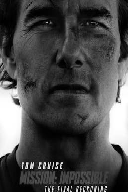

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the new poster image
img_path = "poster_demo.jpeg"  # Replace with your file path
img = image.load_img(img_path, color_mode='grayscale', target_size=(192, 128))  # Resize to match input
img_array = image.img_to_array(img)

# Expand dimensions to (1, 192, 128, 1)
img_array = np.expand_dims(img_array, axis=0)

# Normalize if needed (depends on your original preprocessing)
img_array = img_array / 255.0  # If you scaled training images this way

img


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 190, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 95, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 95, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 93, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 46, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 46, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 44, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 22, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 39424)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     5,046,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,139,972 (19.61 MB)

 Trainable params: 5,139,780 (19.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.3608 - loss: 14.4516 - val_accuracy: 0.1862 - val_loss: 1.3946
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3521 - loss: 1.3153 - val_accuracy: 0.3379 - val_loss: 1.3858
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5269 - loss: 1.2225 - val_accuracy: 0.3379 - val_loss: 1.3840
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4729 - loss: 1.1947 - val_accuracy: 0.3379 - val_loss: 1.3827
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4851 - loss: 1.1515 - val_accuracy: 0.3379 - val_loss: 1.3807
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5097 - loss: 1.1940 - val_accuracy: 0.3379 - val_loss: 1.3784
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4942 - loss: 1.1388 - val_accuracy: 0.3379 - val_loss: 1.3752
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5012 - loss: 1.1574 - val_accuracy: 0.4138 -

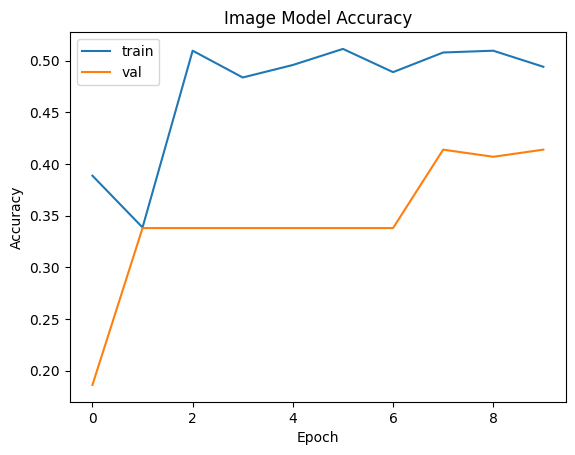

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted genre: 2


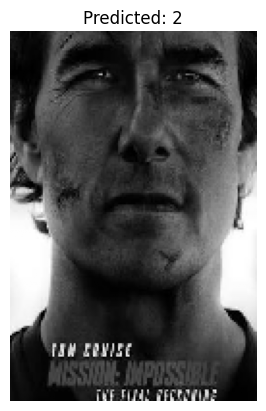

In [41]:
# only contains pixel data to predict
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Expand grayscale to (H, W, 1)
X = np.expand_dims(data, axis=-1)  # Now shape is (724, 192, 128, 1)

# One-hot encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y, num_classes=4)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# build simple CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(192, 128, 1)),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10
)

# accuracy plot

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Image Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Decode label
predicted_label = le.inverse_transform([predicted_class])
print("Predicted genre:", predicted_label[0])

import matplotlib.pyplot as plt

plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()



In [42]:
genre_names = ['action', 'comedy', 'horror', 'romance']
print("Predicted genre:", genre_names[predicted_class])



Predicted genre: horror


# contains both description data & pixel data

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 192, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 190, 126,  │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 95, 63,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 95, 63,    │        128 │ max_pooling2d_5[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 93, 61,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 300, 128)  │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 46, 30,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 88320)     │          0 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │  5,652,544 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4)         │        260 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,013,572 (26.75 MB)

 Trainable params: 7,013,508 (26.75 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3172 - loss: 4.9785 - val_accuracy: 0.3310 - val_loss: 1.3839
Epoch 2/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3492 - loss: 1.5867 - val_accuracy: 0.3586 - val_loss: 1.3507
Epoch 3/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4284 - loss: 1.1951 - val_accuracy: 0.4207 - val_loss: 1.3090
Epoch 4/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5299 - loss: 1.1165 - val_accuracy: 0.3586 - val_loss: 1.3301


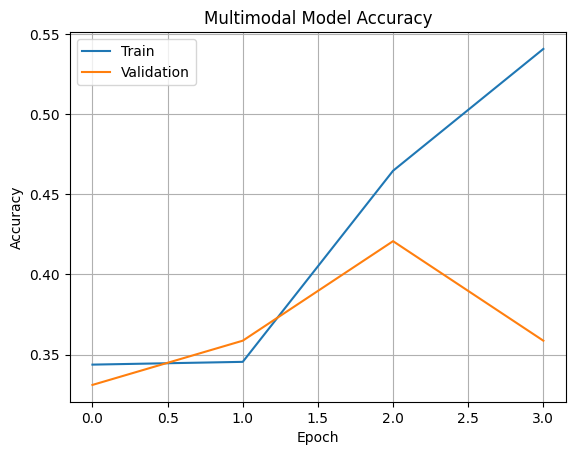

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, string
import nltk
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, LSTM, Dense, Dropout,
                                     Conv2D, MaxPooling2D, Flatten, concatenate, BatchNormalization)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import contractions

# --- 4. Align Descriptions with Image IDs ---
df_filtered = df[df["movie_id"].isin(ids)].copy()
df_filtered = df_filtered.set_index("movie_id").loc[ids].reset_index()

# --- 5. Text Tokenization ---
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_filtered["cleaned_description"])

X_txt = tokenizer.texts_to_sequences(df_filtered["cleaned_description"])
X_txt = pad_sequences(X_txt, maxlen=300)

# --- 6. Label Encoding ---
le = LabelEncoder()
y = le.fit_transform(df_filtered["genre"])
y_cat = to_categorical(y, num_classes=4)

# --- 7. Train/Test Split ---
X_txt_train, X_txt_val, X_img_train, X_img_val, y_train, y_val = train_test_split(
    X_txt, X_img, y_cat, test_size=0.2, stratify=y, random_state=42
)

# --- 8. Define Multimodal Model ---
# TEXT branch
text_input = Input(shape=(300,), name='text_input')
x_txt = Embedding(input_dim=10000, output_dim=128)(text_input)
x_txt = LSTM(64)(x_txt)
x_txt = Dense(64, activation='relu')(x_txt)

# IMAGE branch
image_input = Input(shape=(192, 128, 1), name='image_input')
x_img = Conv2D(32, (3,3), activation='relu')(image_input)
x_img = MaxPooling2D((2,2))(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(64, (3,3), activation='relu')(x_img)
x_img = MaxPooling2D((2,2))(x_img)
x_img = Flatten()(x_img)
x_img = Dense(64, activation='relu')(x_img)

# Combine
combined = concatenate([x_txt, x_img])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=[text_input, image_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- 9. Train the Model ---
history = model.fit(
    [X_txt_train, X_img_train], y_train,
    validation_data=([X_txt_val, X_img_val], y_val),
    batch_size=32,
    epochs=4
)

# --- 10. Plot Accuracy ---
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Multimodal Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




  adding: content/bert_model/ (stored 0%)
  adding: content/bert_model/tokenizer.json (deflated 71%)
  adding: content/bert_model/tokenizer_config.json (deflated 75%)
  adding: content/bert_model/model.safetensors (deflated 8%)
  adding: content/bert_model/special_tokens_map.json (deflated 42%)
  adding: content/bert_model/config.json (deflated 50%)
  adding: content/bert_model/vocab.txt (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Load compressed NPZ
npzfile = np.load("imdb_posters.npz", allow_pickle=True)
X_img = npzfile['data']           # shape: (n, 192, 128)
img_labels = npzfile['labels']    # genre strings
ids = npzfile['ids']              # movie_id strings

# Reshape image data (grayscale: add channel dim)
X_img = X_img.astype('float32') / 255.0  # Normalize to [0, 1]
X_img = np.expand_dims(X_img, axis=-1)  # (n, 192, 128, 1)

# Align df rows with image data (using 'movie_id')
df_filtered = df[df["movie_id"].isin(ids)].copy()
df_filtered = df_filtered.set_index("movie_id").loc[ids].reset_index()

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_filtered["cleaned_description"])

X_txt = tokenizer.texts_to_sequences(df_filtered["cleaned_description"])
X_txt = pad_sequences(X_txt, maxlen=300)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(df_filtered["genre"])         # Converts genre to 0–3
y_cat = to_categorical(y, num_classes=4)           # One-hot encoded

from sklearn.model_selection import train_test_split

X_txt_train, X_txt_val, X_img_train, X_img_val, y_train, y_val = train_test_split(
    X_txt, X_img, y_cat, test_size=0.2, stratify=y, random_state=42
)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 192, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 190, 126,  │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 95, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 95, 63,    │        128 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 93, 61,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 300, 128)  │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 46, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     49,408 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 88320)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │  5,652,544 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4)         │        260 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,013,572 (26.75 MB)

 Trainable params: 7,013,508 (26.75 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.3877 - loss: 1.2893 - val_accuracy: 0.3448 - val_loss: 1.4340
Epoch 2/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4912 - loss: 1.1422 - val_accuracy: 0.3448 - val_loss: 1.2998
Epoch 3/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6425 - loss: 0.9322 - val_accuracy: 0.4000 - val_loss: 1.2422
Epoch 4/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7239 - loss: 0.6633 - val_accuracy: 0.3862 - val_loss: 1.2637


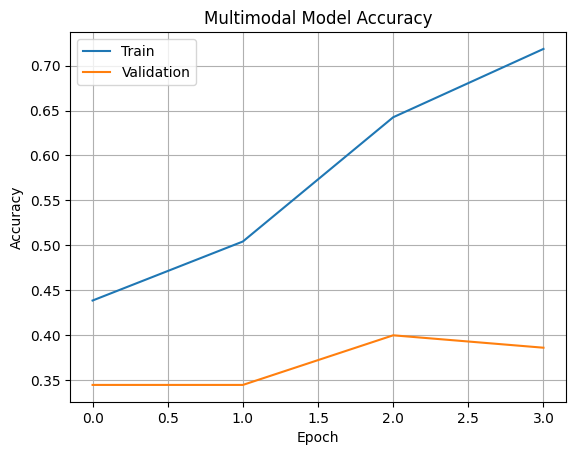

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, LSTM, Dense, Dropout,
                                     Conv2D, MaxPooling2D, Flatten, concatenate, BatchNormalization)

# TEXT branch
text_input = Input(shape=(300,), name='text_input')
x_txt = Embedding(input_dim=10000, output_dim=128)(text_input)
x_txt = LSTM(64)(x_txt)
x_txt = Dense(64, activation='relu')(x_txt)

# IMAGE branch
image_input = Input(shape=(192, 128, 1), name='image_input')
x_img = Conv2D(32, (3, 3), activation='relu')(image_input)
x_img = MaxPooling2D((2, 2))(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(64, (3, 3), activation='relu')(x_img)
x_img = MaxPooling2D((2, 2))(x_img)
x_img = Flatten()(x_img)
x_img = Dense(64, activation='relu')(x_img)

# COMBINE branches
combined = concatenate([x_txt, x_img])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=[text_input, image_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    [X_txt_train, X_img_train], y_train,
    validation_data=([X_txt_val, X_img_val], y_val),
    batch_size=32,
    epochs=4
)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Multimodal Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
